<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/One_Way_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This Python notebook demonstrates the computation of One-Way ANOVA. 
The example is from Montgomery Intro to SQC (7th ed chap 4). Paper strength by hardwood concentration. Ref.
https://www.pythonfordatascience.org/anova-python/ 
https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

In [57]:
import math
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('https://raw.githubusercontent.com/changsksu/KState_IMSE541/main/paper%20strength%20one-way%20ANOVA.csv', sep=',', na_values=".")
data

,Obs,Conc,Strength
0,1,5,7
1,2,5,8
2,3,5,15
3,4,5,11
4,5,5,9
5,6,5,10
6,1,10,12
7,2,10,17
8,3,10,13
9,4,10,18


In [25]:
# filter out 5% hardwood concentration and validate it
Conc5=data[data['Conc']==5]['Strength']
Conc5

0     7
1     8
2    15
3    11
4     9
5    10
Name: Strength, dtype: int64

In [26]:
# another way for filtering
conc5=data['Strength'][data['Conc'] == 5]
conc5

0     7
1     8
2    15
3    11
4     9
5    10
Name: Strength, dtype: int64

In [27]:
#x5_bar
statistics.mean(conc5)

10

In [43]:
np.mean(conc5)

10.0

In [45]:
statistics.stdev(conc5)

2.8284271247461903

In [44]:
np.std(conc5, ddof=1)

2.8284271247461903

In [28]:
# filter out all other concentration
Conc10=data[data['Conc']==10]['Strength']
Conc15=data[data['Conc']==15]['Strength']
Conc20=data[data['Conc']==20]['Strength']

# run one way anova using scipy f_onway function

In [29]:
# run one way anova using scipy f_onway function
# make sure Conc is capital on the first letter; varaible name is case sensitive!
stat, p=f_oneway(Conc5, Conc10, Conc15, Conc20 )
print('stat=%.3f, p=%.3f' %(stat,p))

stat=19.605, p=0.000


The F test from one-way ANOVA is used to test
**H0: tau5%=tau10%=tau15%=mtau20%=0 **vs
H1: at least one tau <>0
Since the pvalue is very small, we would reject H0 and conclude that 
there is a difference in paper strenght influenced by hardwood concentration 

# Linear Model for One Factor Analysis

In [30]:
df=data #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Obs       24 non-null     int64
 1   Conc      24 non-null     int64
 2   Strength  24 non-null     int64
dtypes: int64(3)
memory usage: 704.0 bytes


In [31]:
# To generate anova table using the ols model from statsmodel

model = ols('Strength ~ C(Conc)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Conc),382.791667,3.0,19.605207,0.000004
Residual,130.166667,20.0,NaN,NaN


In [53]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           3.59e-06
Time:                        15:21:44   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.0000      1.041      9.602

In [55]:
# the prediction is actually Yi_ bar, i=1,2, ..., a (number of treatments) for all observations
# for example conc=5% has 6 obs at the same values, etc
strength_predict=model.predict()
strength_predict

array([10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 15.66666667, 15.66666667, 15.66666667, 15.66666667,
       15.66666667, 15.66666667, 17.        , 17.        , 17.        ,
       17.        , 17.        , 17.        , 21.16666667, 21.16666667,
       21.16666667, 21.16666667, 21.16666667, 21.16666667])

In [46]:
# Compute ANOVA table with MSE
# This is a more simplified version of the OLS summary table
"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F)
C(Conc),382.791667,3.0,127.597222,19.605207,0.000004
Residual,130.166667,20.0,6.508333,NaN,NaN


MSE=mean_sq of Residual, in this case MSE=6.5

In [36]:
# R2 value
model.rsquared

0.7462431971407685

In [37]:
# Adjusted R2 value
model.rsquared_adj

0.7081796767118838

In [16]:
residuals=model.resid
residuals

0    -3.000000e+00
1    -2.000000e+00
2     5.000000e+00
3     1.000000e+00
4    -1.000000e+00
5    -7.105427e-15
6    -3.666667e+00
7     1.333333e+00
8    -2.666667e+00
9     2.333333e+00
10    3.333333e+00
11   -6.666667e-01
12   -3.000000e+00
13    1.000000e+00
14    2.000000e+00
15    7.105427e-15
16   -1.000000e+00
17    1.000000e+00
18   -2.166667e+00
19    3.833333e+00
20    8.333333e-01
21    1.833333e+00
22   -3.166667e+00
23   -1.166667e+00
dtype: float64

# Model Validation and Residual Analysis

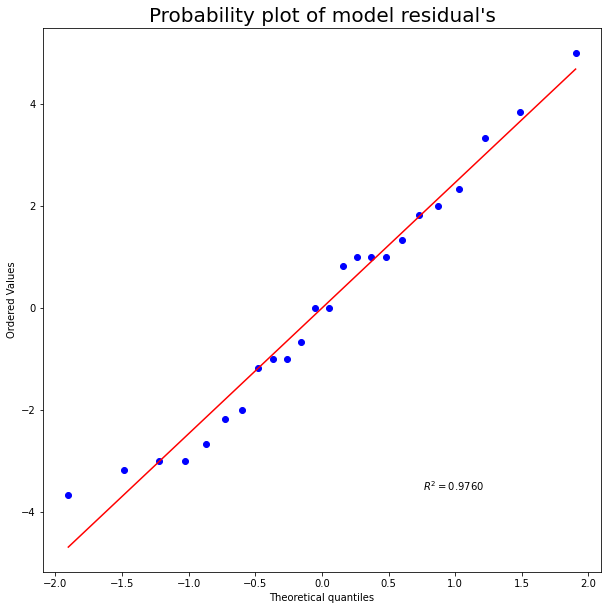

In [ ]:
# Residual Analysis
# normal check
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [38]:
# Homogeneity of Variance check
# Levene() method

stats.levene(df['Strength'][df['Conc'] == 5],
             df['Strength'][df['Conc'] == 10],
             df['Strength'][df['Conc'] == 15],
             df['Strength'][df['Conc'] == 20])

LeveneResult(statistic=0.5988455988455988, pvalue=0.6231941028644978)

The p value of the Levene is very large. We don't have evidence to conclude that the variances from different hardwood concentration are different

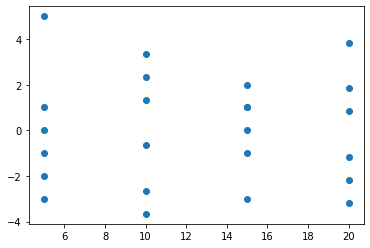

In [49]:
# Plot fo residuals vs factor levels (e.g different treatments)
import matplotlib.pyplot as plt

treatment=data['Conc']

plt.scatter(treatment, residuals)

plt.show()

To visualized constant variance assumption, observe the length of each bar of similar length. Apply both scatter plots above and below.

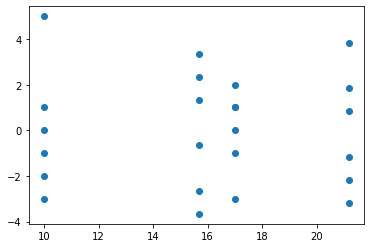

In [56]:
# Plot fo residuals vs prediction at factor levels (e.g different treatments)
# Usually run with the previous block

plt.scatter(strength_predict, residuals)

plt.show()

In [60]:
# Standard Error se computation
# se= sqrt(MSE/n) where n is number of obs for each treatment; n=6 in this case
# use the se value as a visual guide in the above plot
# ref. figure 4.12 of Montgomery Intro to SQC 7ed
se= model.mse_resid/6
se


1.0847222222222221

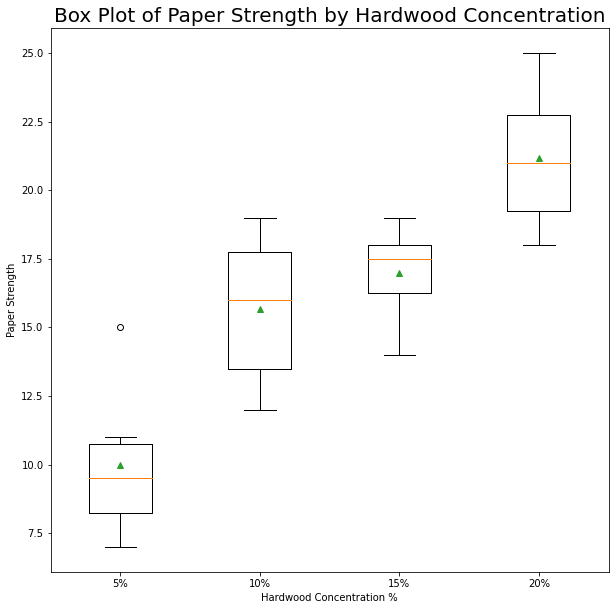

In [39]:
# Box plots by factor levels'

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Paper Strength by Hardwood Concentration", fontsize= 20)
ax.set

#data2 = [df['Strength'][df['Conc'] == 5],
#             df['Strength'][df['Conc'] == 10],
#             df['Strength'][df['Conc'] == 15],
#             df['Strength'][df['Conc'] == 20]]

data2=[Conc5, Conc10, Conc15, Conc20]

ax.boxplot(data2,
           labels= ['5%', '10%', '15%', '20%'],
           showmeans= True)

plt.xlabel("Hardwood Concentration %")
plt.ylabel("Paper Strength")

plt.show()

In [40]:
# the data structure of data2
print(data2)

[0     7
1     8
2    15
3    11
4     9
5    10
Name: Strength, dtype: int64, 6     12
7     17
8     13
9     18
10    19
11    15
Name: Strength, dtype: int64, 12    14
13    18
14    19
15    17
16    16
17    18
Name: Strength, dtype: int64, 18    19
19    25
20    22
21    23
22    18
23    20
Name: Strength, dtype: int64]


# Multiple Comparison Tests

In [41]:
# Multiple comparison test 
# ref https://www.statsmodels.org/devel/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html 
#Tukey Honestly Significat Difference (HSD)
comp = mc.MultiComparison(df['Strength'], df['Conc'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
5,10,5.6667,0.0051,1.5439,9.7894,True
5,15,7.0,0.001,2.8773,11.1227,True
5,20,11.1667,0.001,7.0439,15.2894,True
10,15,1.3333,0.7827,-2.7894,5.4561,False
10,20,5.5,0.0066,1.3773,9.6227,True
15,20,4.1667,0.047,0.0439,8.2894,True


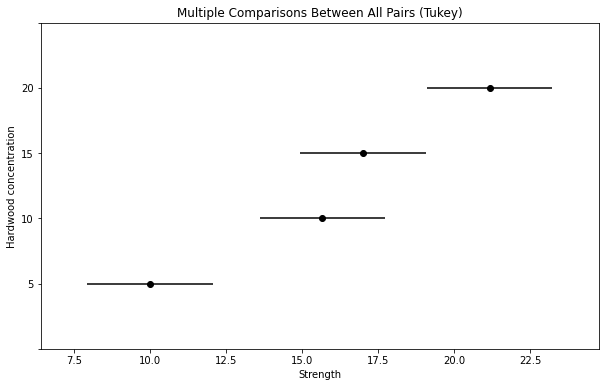

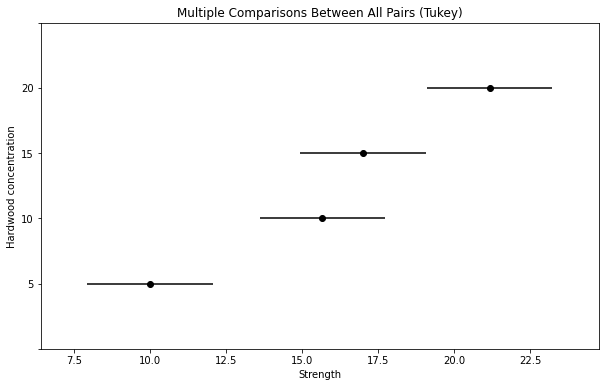

In [42]:
#visualize the Tukey test
post_hoc_res.plot_simultaneous(ylabel= "Hardwood concentration", xlabel= "Strength")